In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split as TTS

In [2]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.isnull().sum().sum()

0

In [4]:
X_train, X_test, y_train, y_test=TTS(df[["per capita income (US$)"]],df.year,test_size=0.2,random_state=0)

In [5]:
print(X_train.head())

    per capita income (US$)
27             17310.757750
32             19232.175560
29             17581.024140
43             42676.468370
2               4251.175484


In [6]:
print(X_test.head())

    per capita income (US$)
28             16622.671870
33             22739.426280
30             18987.382410
4               5576.514583
18             15080.283450


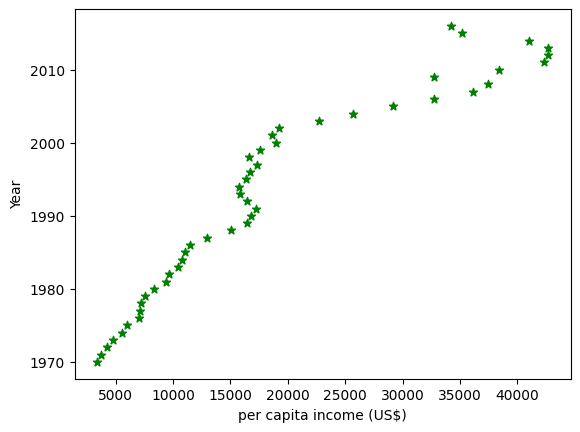

In [7]:
%matplotlib inline
plt.xlabel("per capita income (US$)")
plt.ylabel("Year")
plt.scatter(df[["per capita income (US$)"]],df.year,color='green',marker="*")

In [8]:
df.rename(columns={"per capita income (US$)":"income"},inplace=True)
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [23]:
# Add a constant to X for statsmodels OLS
X=df["year"]
X=sm.add_constant(X)
# X=df["year"]
y=df["income"]

In [24]:
X_train, X_test, y_train, y_test = TTS(X,y,test_size=0.2,random_state=0)
X_train.head()

,const,year
27,1.0,1997
32,1.0,2002
29,1.0,1999
43,1.0,2013
2,1.0,1972


In [25]:
# Fit the OLS model
model=sm.OLS(y_train,X_train).fit()
model

In [26]:
# Predict on the test set
y_pred=model.predict(X_test)

In [27]:
#residuals
residuals=y_test-y_pred
residuals

28   -6865.215796
33   -4940.873759
30   -6177.470205
4     2212.206307
18     -22.779470
11     200.705054
42    7438.613660
31   -7401.937850
22   -2044.909728
10     -39.235003
dtype: float64

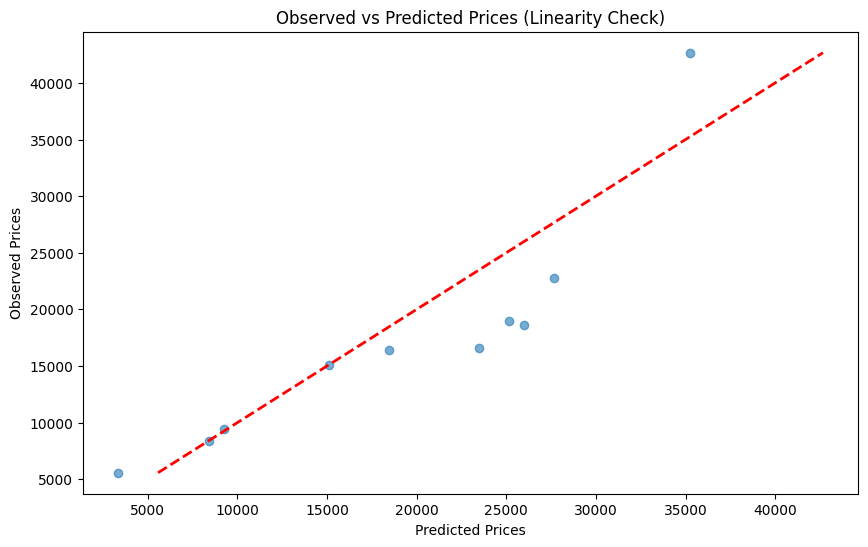

In [28]:
# Assumption 1: Linearity - Check with a scatter plot of observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Observed Prices')
plt.title('Observed vs Predicted Prices (Linearity Check)')
plt.show()

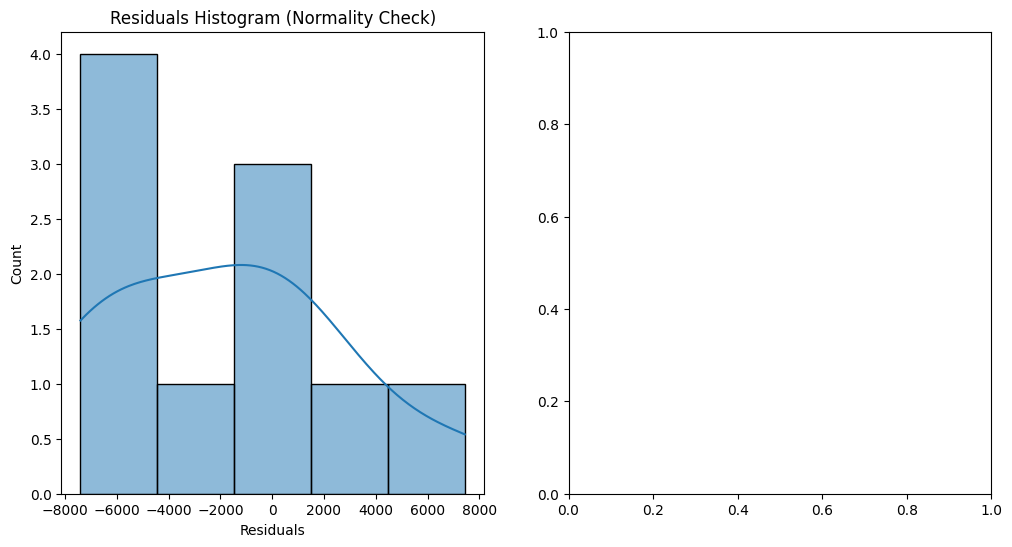

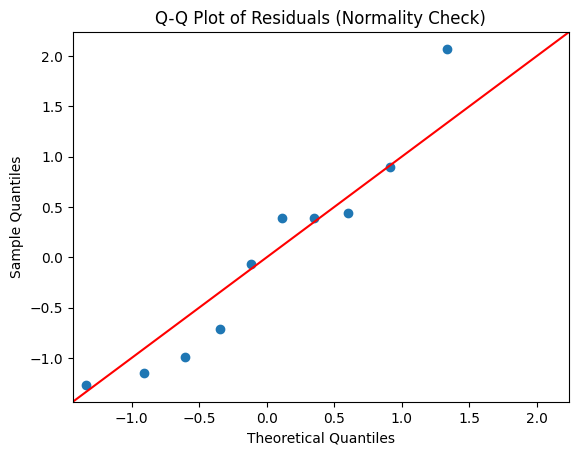

In [29]:
# Assumption 2: Normality of Errors - Check with histogram and Q-Q plot of residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram (Normality Check)')

# Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Normality Check)')
plt.show()


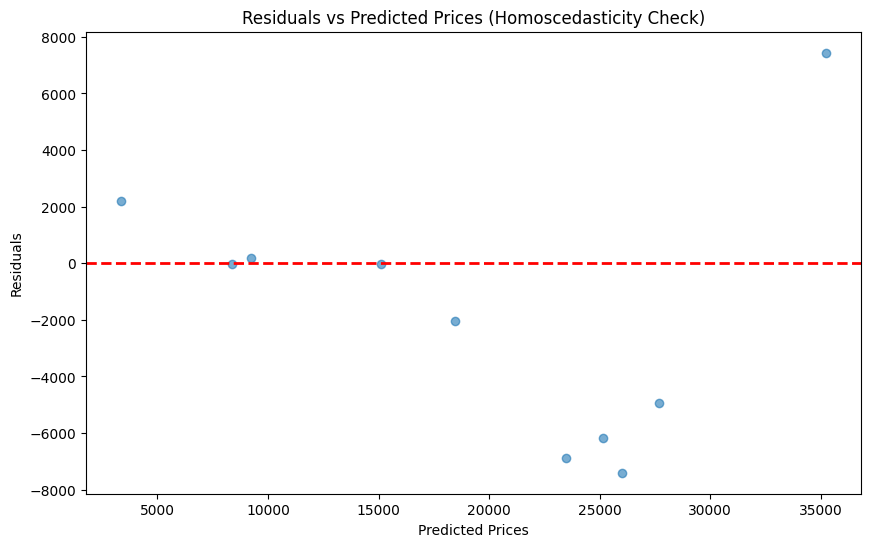

In [30]:
# Assumption 3: Homoscedasticity - Check with a scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices (Homoscedasticity Check)')
plt.show()

In [33]:
# Assumption 4: No Multicollinearity - Check Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
  feature           VIF
0   const  19999.685472
1    year      1.000000


In [34]:
# Assumption 5: No Autocorrelation - Check using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Durbin-Watson statistic interpretation
if dw_stat < 1.5:
    print("Potential positive autocorrelation.")
elif dw_stat > 2.5:
    print("Potential negative autocorrelation.")
else:
    print("No significant autocorrelation.")


Durbin-Watson statistic: 1.6860616360942475
No significant autocorrelation.
